![hslu_logo.png](img/hslu_logo.png)

## Week 01

<hr style="border:1px solid black">

# Exercise: Optimization using PyTorch - using autograd option
---
This exercise is to illustrate the optimization procedure using the fit of a sine-function with a polynomial of a given degree.  We use the possibility of pytorch to determine gradients of tensors automatically, the so-called autograd option.




### Import necessary packages

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import math

#### Create a function and plot it

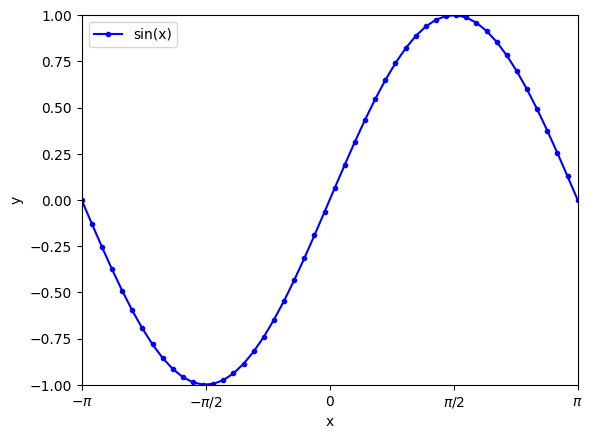

In [10]:
data_x = torch.linspace(-math.pi, math.pi, 50, dtype=torch.float)
data_y = torch.sin(data_x)


sin_fct = plt.plot(data_x,data_y,'b.-',label='sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-math.pi, math.pi,-1,1])
plt.xticks((-math.pi,-math.pi/2,0,math.pi/2,math.pi),('$-\pi$','$-\pi$/2','0','$\pi$/2','$\pi$'))
plt.legend()
plt.show(sin_fct)

#### Define class for fitting the function

In [13]:
class poly_fit():
    """
    fit function  
    """
    def __init__(self, degree):
        """
        constructor

        Arguments:
        degree -- of polynomial (# of fit parameters)
        
        """
        self.degree = degree
        # initialize weights and bias (zero or random)
        self.initialise_weights()
    
    
    def initialise_weights(self):
        """
        initialise weights
        """

        ### START YOUR CODE ###

        #extend the initialization with autograd functionality

        # initialize weights (default is row vector) and bias 
        self.W = torch.randn([self.degree], requires_grad=True)      
        self.B = torch.randn(1, requires_grad=True)
        
        ### END YOUR CODE ###      
        
    def propagate(self, X):
        """
        calculates the function estimation based on current parameters [W,B]
        """    
        self.Y_pred = self.W @ X + self.B

        return self.Y_pred
           
     
    def back_propagate(self, cost):
        """
        calculates the backpropagation results based on expected output y
        this function must be performed AFTER the corresponding propagate step
        """    
        cost.backward()
 

    def calc_cost(self, Y):
        """
        calculates the MSE loss function
        """
        cost = 1/2*(self.Y_pred - Y).pow(2).mean()
        
        return cost
    
        
        
    def gradient_descend(self, alpha):
        """
        does the gradient descend based on results from last back_prop step with learning rate alpha
        """
        with torch.no_grad():
            self.W -= alpha * self.W.grad
            self.B -= alpha * self.B.grad

        ### START YOUR CODE ###
        # clear the gradient members of W and B
    
        self.W.grad = None
        self.B.grad = None
    
        ### END YOUR CODE ###
        
        
    def optimize(self, data, epochs, alpha, debug=0):
        """
        performs epochs number of gradient descend steps and appends result to output array

        Arguments:
        data -- dictionary with data
        epochs -- number of epochs
        alpha -- learning rate
        debug -- False (default)/True; get info on each gradient descend step
        """
        
        # save results before 1st step
        for i0 in range(0, epochs):
            #do prediction
            self.propagate(data['X_train'])
            #determine the loss 
            cost = self.calc_cost(data['Y_train'])
            #determine the error
            self.back_propagate(cost)
            #do the correction step
            self.gradient_descend(alpha)
            
            if debug and np.mod(i0, debug) == 0:
                print('step %r, cost %r' % (i0, cost))
                        
            

#### Define X and Y values and do optimization

In [22]:
#fix the degree
degree = 3

data_X = torch.zeros([degree, data_x.shape[0]])
for i0 in range(0, degree):
    data_X[i0,:] = (data_x/math.pi).pow(1+2*i0)

data = {'X_train' : data_X, 'Y_train' : data_y}

poly_fit_inst = poly_fit(degree)

poly_fit_inst.optimize(data, 100000, 0.1,10000)


step 0, cost tensor(0.4992, grad_fn=<MulBackward0>)
step 10000, cost tensor(0.0027, grad_fn=<MulBackward0>)
step 20000, cost tensor(0.0007, grad_fn=<MulBackward0>)
step 30000, cost tensor(0.0002, grad_fn=<MulBackward0>)
step 40000, cost tensor(4.8021e-05, grad_fn=<MulBackward0>)
step 50000, cost tensor(2.0137e-05, grad_fn=<MulBackward0>)
step 60000, cost tensor(1.3479e-05, grad_fn=<MulBackward0>)
step 70000, cost tensor(1.1886e-05, grad_fn=<MulBackward0>)
step 80000, cost tensor(1.1504e-05, grad_fn=<MulBackward0>)
step 90000, cost tensor(1.1411e-05, grad_fn=<MulBackward0>)


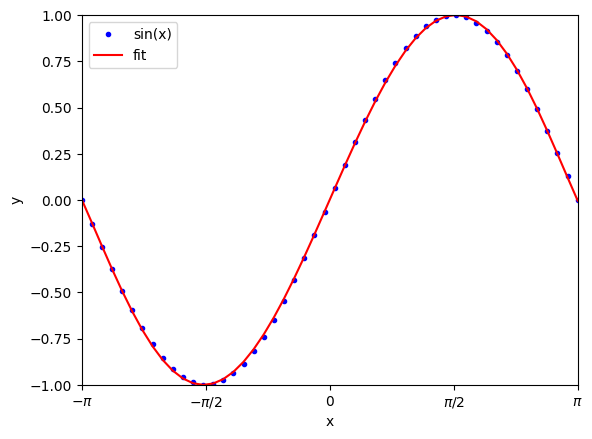

In [20]:
with torch.no_grad():
    y_pred = poly_fit_inst.propagate(data_X).numpy()

sin_fct = plt.plot(data_x,data_y,'b.', label='sin(x)')
plt.plot(data_x,y_pred,'r-', label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-math.pi, math.pi,-1,1])
plt.xticks((-math.pi,-math.pi/2,0,math.pi/2,math.pi),('$-\pi$','$-\pi$/2','0','$\pi$/2','$\pi$'))
plt.legend()
plt.show(sin_fct)